# Example using the UnivariateDistFit class

This notebook walks through the basic use case of the UnivariateDistFit class (currently only set up for continuous distirbutions). The first code chunk reads loads the class which would go wiht other modele imports, and the next code chunk just pulls a column from a standard dataset.

The class was created to automate/standardize some distribution fitting processes. This should help to get a high-level overview and to get to deeper analysis more quickly. Full information about the class's attributes and methods can be found in the last code chunk or by calling `help` on the class.

This code is very much still a work in progress with many TODOs laid out in the `dist_fit.py` file.

In [1]:
#import the code
from dist_fit import UnivariateDistFit

In [2]:
#grab some data
from pandas import read_csv
data = read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
#takes in a single DF, numpy array, list, or other array like objects
data = data['sepal_length']

When initializing the class, you can filter down the distributions by filtering on the distribution characteristics. Current available characteristics are shown below where the i and ni in the support characteristics stand for inclusive and not inclusive respectively (you can also use the distirbution name as a characteristic). Any number of charactersitics can be used for filtering by matching at least one condition or all the conditions.

*Number of parameters hasn't been completed yet FYI*

In [3]:
UnivariateDistFit.characteristics.sort()
UnivariateDistFit.characteristics

['01_i support',
 '01_ni support',
 '0inf_i support',
 '0inf_ni support',
 '1param',
 '2param',
 '3param',
 'continuous',
 'real support']

In the class initialization, the data is fit to the filtered distributions (so warnings/errors could occur here until logic is built out to handle that). The resutls of the fitting can be accessed with the `fitDF` attribute or by using the `printFit()` method.

*Note: I've gone back and forth on the the choice to fit the distributions during the intialization. It might make more sense intialize the object, look at the summary stats/plot of the data, and then filter down the distributions and fit to the data*

In [4]:
#data_fit = UnivariateDistFit(data, filters=['continuous', 'norm'])
data_fit = UnivariateDistFit(data) # default use all distirbutions

## printEmpSummary()

One method that can be applied after initializing is `printEmpSummary()` which prints summary statistics related to the input data. Percentiles are currently calculated using the "nearest" option from numpy's `percentile` function.

In [5]:
data_fit.printEmpSummary()


Empirical Summary
 --------------------
# Obs -->  150
Mean -->  5.843333333333334
Meadian -->  5.8
SD -->  0.8253012917851409
Min -->  4.3
Max -->  7.9
1st %tile -->  4.4
99th %tile -->  7.7


## plotFit()

The next method is `plotFit()`. This plots the empirical data as a histogram (number of bins can be adjusted based on the `bin` argument) and then the pdfs of the fitted distributions.

Additional keyword arguments for the matplotlib pyplot `legend()` function to adjust the legend if it gets in the way.

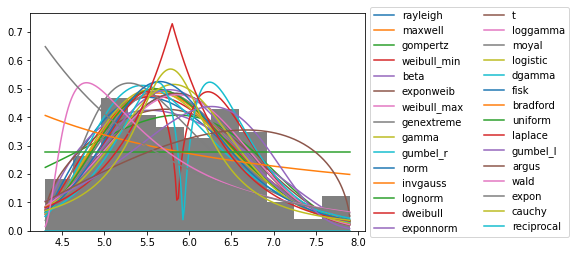

In [6]:
data_fit.plotFit(bins=11, ncol=2, loc = 'center left', bbox_to_anchor=(1,.5))

## printFit()

`printFit()` prints off the `fitDF` attribute by default but also has a `pretty_print` argument that can be turned on for a couple of additional features. Both views are sorted based on BIC. 

`fitDF` is a pandas DataFrame that contains the fitted parameters, the logLikelihood, the KS goodness of fit p-value, BIC, and the 1st and 99th percentiles.

*Note: scipy is a bit wierd with the distribution fitting since it sets up all of the are standardized versions. This allows for things like the beta distribution to be fit despite the data not being in the support. Parameters 3 and 4 are usually shifting and scaling factors. This can be adjusted for each distribution. For exampling gitting a gamma distribution with the `floc=0` argument passed in will result in the same fitted parameters between R and Python*

Additional features include coloring KS goodness of fit p-values red when the test would be rejected, highlighting the smallest value in the 1st percentile column (P01), and highlighting the largest value of the 99th percentile column (P99). The highlighting decisions were mainly just show the ability and changed later. *Pretty print output may not appear correctly when running from the shell or in GitHub's notebook viewer.*

Additionally, the columns can be formatted based on the `col_fmt` argument as shown in the exmaple below. You can feed in a single string or dictionary specifying columns to format (not all columns are needed in the dictionary; logLikihood is not formatted in the example below). In the example below, the P01 and P99 columns are formatted as percentages, which isn't useful here, but could be useful in different analyses.

In [7]:
data_fit.printFit()
#formatting for each columns 

data_fit.printFit(pretty_print=True, col_fmt={'Param1':"{:.1f}", 'Param2':"{:.1f}", 'Param3':"{:.1f}",
                                              'ksPvalue':"{:.3f}", 'BIC':"{:.2f}",
                                              'P01':"{:.1%}", 'P99':"{:.1%}"})

                   Param1      Param2     Param3        Param4      logLik  \
dist                                                                         
rayleigh     4.214764e+00    1.291009        NaN           NaN -179.181278   
maxwell      3.915342e+00    1.210834        NaN           NaN -179.881185   
gompertz     2.621113e-01    4.300000   1.174715           NaN -177.923677   
weibull_min  2.161977e+00    4.154281   1.907285           NaN -178.941530   
beta         1.808447e+00    2.704618   4.249868  3.979288e+00 -177.057685   
exponweib    4.337242e-01    3.362323   4.277001  2.370608e+00 -177.401007   
weibull_max  5.744989e+00    9.869236   4.356799           NaN -181.310422   
genextreme   1.740564e-01    5.512403   0.758337           NaN -181.310423   
gamma        8.718182e+00    3.354126   0.285519           NaN -181.327819   
gumbel_r     5.443754e+00    0.718977        NaN           NaN -183.880862   
norm         5.843333e+00    0.825301        NaN           NaN -

,Param1,Param2,Param3,Param4,logLik,ksPvalue,BIC,P01,P99
dist,,,,,,,,,
rayleigh,4.2,1.3,nan,nan,-179.181278,0.459,368.38,439.8%,813.3%
maxwell,3.9,1.2,nan,nan,-179.881185,0.217,369.78,432.6%,799.4%
gompertz,0.3,4.3,1.2,nan,-177.923677,0.703,370.88,434.4%,773.2%
weibull_min,2.2,4.2,1.9,nan,-178.941530,0.330,372.91,438.1%,802.0%
beta,1.8,2.7,4.2,3.979288,-177.057685,0.689,374.16,438.8%,773.4%
exponweib,0.4,3.4,4.3,2.370608,-177.401007,0.613,374.84,437.8%,779.7%
weibull_max,5.7,9.9,4.4,nan,-181.310422,0.192,377.65,418.6%,791.3%
genextreme,0.2,5.5,0.8,nan,-181.310423,0.192,377.65,418.6%,791.3%
gamma,8.7,3.4,0.3,nan,-181.327819,0.253,377.69,430.7%,821.1%


## plotCompare()

`plotCompare()` compares the distributions based on a column/metric in the `fitDF` DataFrame. The default is BIC but other, possibly future, metrics can be specified with the `metric` argument. By default, only shows top 10 of each metric; this can be adjusted with the `top_n`argument. You can also filter out distirbutions that are rejected by a specified goodness of fit test (`gof_filter` but currently only option would be 'ksPvalue' until CvM or AD or something else is implemented) at specified alpha level (`gof_alpha`)

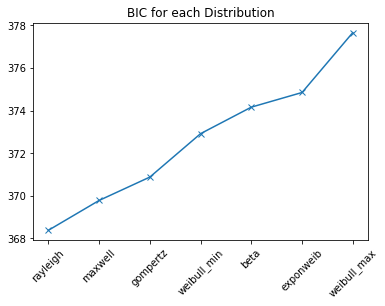

In [8]:
data_fit.plotCompare(top_n=7)

## runAll()

Finally, all of these steps can be run in a single line with the `runAll()` method. There is less control using this method though (only arguments are `pretty_print` for the `printFit()` method and `metric` for the `plotCompare()` method).


Empirical Summary
 --------------------
# Obs -->  150
Mean -->  5.843333333333334
Meadian -->  5.8
SD -->  0.8253012917851409
Min -->  4.3
Max -->  7.9
1st %tile -->  4.4
99th %tile -->  7.7


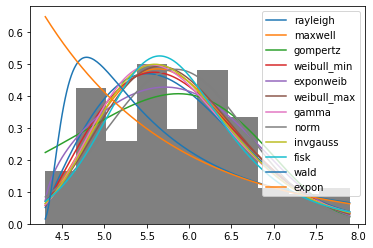




Fit Summary
----------
               Param1    Param2     Param3    Param4      logLik  \
dist                                                               
rayleigh     4.214764  1.291009        NaN       NaN -179.181278   
maxwell      3.915342  1.210834        NaN       NaN -179.881185   
gompertz     0.262111  4.300000   1.174715       NaN -177.923677   
weibull_min  2.161977  4.154281   1.907285       NaN -178.941530   
exponweib    0.433724  3.362323   4.277001  2.370608 -177.401007   
weibull_max  5.744989  9.869236   4.356799       NaN -181.310422   
gamma        8.718182  3.354126   0.285519       NaN -181.327819   
norm         5.843333  0.825301        NaN       NaN -184.039766   
invgauss     0.041553  1.734803  98.874576       NaN -181.683131   
fisk         8.158402  1.827771   3.942442       NaN -186.439359   
wald         4.164332  2.059259        NaN       NaN -212.635617   
expon        4.300000  1.543333        NaN       NaN -215.091687   

                 ksPv

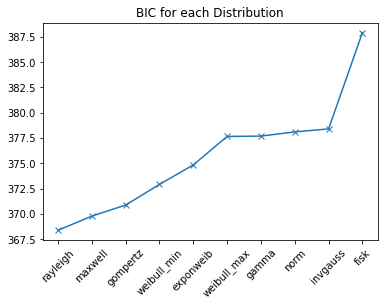

In [9]:
UnivariateDistFit(data, filters=['0inf_ni support', '0inf_i support', 'norm']).runAll()

## Additional Info

In [10]:
help(UnivariateDistFit)

Help on class UnivariateDistFit in module dist_fit:

class UnivariateDistFit(builtins.object)
 |  UnivariateDistFit(data, filters='all', filter_type='any')
 |  
 |  a class to perform a standard univariate distirbution fitting process on provided data.
 |  
 |  ...
 |  
 |  Attributes
 |  ----------
 |  DISTRIBUTIONS : dict
 |      dictionary of all possible distributions to fit the data to
 |  filteredDistributions : list
 |      list of distribtions after any filtering applied when initializing the class
 |  data : array_like
 |      a 1 x N dimensional array or list containing the data to be fit
 |  fitDF : DataFrame
 |      a dataframe containing statistics (columns) for each of the distirbutions fit 
 |  
 |  Methods
 |  -------
 |  printEmpSummary():
 |      prints summary statistics related to the data supplied
 |  printFit(pretty_print=False, col_fmt = '{:.3}'):
 |      prints the fitDF attribute
 |  plotFit(plotly=False):
 |      plots empirical data and pdfs of fitted distrib